In [1]:
## Important Options:
run_epochs = 100
run_model_type = "full_y_CVAE"

run_save_folder = "../../outputs/experiments_test/fashion_mnist/cvae/" 
run_read_data_folder = "../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "50_samples_per_class" # 5; 10; 25, 50;


In [2]:
ls ../../outputs

experiments_test/


In [3]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --kl-anneal \
    --kl-anneal-start 0.0 \
    --kl-anneal-stop 1.0 \
    --kl-anneal-ratio 0.2 \
    --kl-anneal-delay-epochs 5 \
    --fixed-prior-zy1-sigma 0.5 \
    --use-q-z-y \
    --trust-set-name {trust_set_name}


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=0.5, kl_anneal=True, kl_anneal_cycles=1, kl_anneal_delay_epochs=5, kl_anneal_ratio=0.2, kl_anneal_start=0.0, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='full_y_CVAE', number_epochs=100, output_folder='../../outputs/experiments_test/fashion_mnist/cvae/', q_y_x_coeff=1.0, qy_sup_weights=None, reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=False, sigma_eps_z_in=0.1, size_input=784, size_output=784, sup_loss_coeff=0.1, train_on_clean_data=False, trust_set_name='50_samples_per_class', use_batch_norm=Fa

In [4]:
pwd

'/afs/inf.ed.ac.uk/group/s1569253/clsvae_public_ready/CLSVAE_SystErrors/src/notebooks'

In [5]:
ls ../../outputs/

experiments_test/


### Define Paths

In [6]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [7]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [8]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [9]:
ls "../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_class.csv
trusted_idxs_10_samples_per_class.csv  y_noise_dict.json


### Check VARS on Notebook

In [10]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.7)
compute_metrics        function         <function compute_metrics at 0x7fdb50c504c0>
dict_main_vars         dict             n=53
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7fda08ba65e0>
file_path_data         str              ../../data/examples_fashi<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>n_mnist/cvae/full_y_CVAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7fda0b34db80>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [11]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'delay_beta_vec', '_delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output', 'outfile'])

### Load Packages 

In [12]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import full_y_CVAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [13]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 1,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': True},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': None,
 'train_size': 0.9,
 'trusted_set': {'dataset_size': 70000,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 18,
                 'percentages': [0.12857142857142856,
                                 0.2571428571428571,
                                 0.6428571428571428,
                                 1.2857142857142856],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [90, 180, 450, 900],
                 'use_labels': 'joint_clas

In [14]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 28]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [15]:
# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [16]:
args.data_folder

'../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/'

In [17]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,28)

y_targets_mdl = ~ torch.from_numpy(y_noise_instance_train).view(-1,1)

x_train_orig = X_train.view(-1,28,28).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,28).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [18]:
dataset_obj.cont_means

0.2880513707152192

In [19]:
dataset_obj.cont_stds

0.3558276959424768

In [20]:
X_train_clean.view(-1,28,28)

tensor([[[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         ...,
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095]],

        [[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         ...,
         [-0.8095, -0.8095, -0.8095,  ...,  0.2485, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.2254, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095]],

        [[-0.8095, -0.8095, -0.8095,  ..., -0.8095, -0.8095, -0.8095],
         [-0.8095, -0.8095, -0.8095,  ..., -0

### Load Model

In [21]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (var_q_z): encodeMVNDiag(
    (torso_encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=785, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (param_nn): GaussDiagDistModule(
      (mu): modSeq(
        (mods_list): ModuleList(
          (0): baseEncoder(
            (activ): ReLU()
            (feat_embedd): ModuleList()
            (mod_fw_seq): Sequential(
              (fc_0): Linear(in_features=785, out_features=200, bias=True)
              (activ_0): ReLU()
              (fc_1): Linear(in_features=200, out_features=100, bias=True)
              (activ_1): ReLU()
              (fc_2): Linear(in_features=100, out_features=50, bias=True)
              (ac

### Load Results from Folder

In [22]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [23]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [24]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1       -56.512431      -56.512431            0.0  -56.512431   
1        2      -180.235223     -180.235223            0.0 -180.235223   
2        3      -279.958695     -279.958695            0.0 -279.958695   
3        4      -344.563899     -344.563899            0.0 -344.563899   
4        5      -389.727900     -389.727900            0.0 -389.727900   
..     ...              ...             ...            ...         ...   
95      96      -482.168482     -482.168482            0.0 -521.522694   
96      97      -482.121414     -482.121414            0.0 -522.211449   
97      98      -484.562488     -484.562488            0.0 -523.499313   
98      99      -482.598249     -482.598249            0.0 -522.197276   
99     100      -481.853249     -481.853249            0.0 -522.323938   

    Avg. KLD_TOT   Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0    1275.286042  1275.286042            0.816022             0.295872   
1    1452.942760  1452.942760            0.792147             0.268627   
2    1543.259685  1543.259685            0.730123             0.156411   
3    1404.831556  1404.831556            0.671355             0.102093   
4    1377.017473  1377.017473            0.681589             0.096626   
..           ...          ...                 ...                  ...   
95     39.354213    39.354213            0.626289             0.054709   
96     40.090036    40.090036            0.630014             0.057140   
97     38.936825    38.936825            0.639768             0.061168   
98     39.599027    39.599027            0.627863             0.056769   
99     40.470689    40.470689            0.628962             0.055773   

    AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0            0.696445            0.471875                  -10.0   
1            0.693432            0.466468                  -10.0   
2            0.639816            0.409488                  -10.0   
3            0.611209            0.387090                  -10.0   
4            0.596529            0.375670                  -10.0   
..                ...                 ...                    ...   
95           0.559083            0.348332                  -10.0   
96           0.557007            0.347100                  -10.0   
97           0.559807            0.348334                  -10.0   
98           0.556983            0.346906                  -10.0   
99           0.557096            0.346886                  -10.0   

    AVPR Row class_y score  Error lower-bound on dirty pos  \
0                    -10.0                        0.259435   
1                    -10.0                        0.224999   
2                    -10.0                        0.203597   
3                    -10.0                        0.199090   
4                    -10.0                        0.181563   
..                     ...                             ...   
95                   -10.0                        0.145663   
96                   -10.0                        0.143990   
97                   -10.0                        0.142835   
98                   -10.0                        0.145526   
99                   -10.0                        0.143401   

    Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         2.794622                   0.551282   
1                         2.794622                   0.708477   
2                         2.794622                   1.139753   
3                         2.794622                   1.526774   
4                         2.794622                   1.625702   
..                             ...                        ...   
95                        2.794622                   1.460221   
96                        2.794622                   1.416736   
97                        2.794622                   1.431253   
98            

In [25]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1       -55.696740      -55.696740            0.0  -55.696740   
1        2      -178.834717     -178.834717            0.0 -178.834717   
2        3      -277.860646     -277.860646            0.0 -277.860646   
3        4      -341.066298     -341.066298            0.0 -341.066298   
4        5      -385.227350     -385.227350            0.0 -385.227350   
..     ...              ...             ...            ...         ...   
95      96      -466.561266     -466.561266            0.0 -505.900152   
96      97      -467.086713     -467.086713            0.0 -507.148062   
97      98      -468.948861     -468.948861            0.0 -507.847576   
98      99      -467.044311     -467.044311            0.0 -506.635435   
99     100      -466.382058     -466.382058            0.0 -506.842117   

    Avg. KLD_TOT   Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0    1265.851797  1265.851797            0.825966             0.300048   
1    1443.287172  1443.287172            0.801575             0.271097   
2    1534.314857  1534.314857            0.733743             0.164541   
3    1395.038823  1395.038823            0.678923             0.107626   
4    1368.164404  1368.164404            0.680023             0.100982   
..           ...          ...                 ...                  ...   
95     39.338888    39.338888            0.630998             0.059887   
96     40.061347    40.061347            0.633143             0.063615   
97     38.898713    38.898713            0.648678             0.067329   
98     39.591123    39.591123            0.639553             0.061604   
99     40.460060    40.460060            0.635936             0.061110   

    AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0            0.695183            0.466976                  -10.0   
1            0.690713            0.461633                  -10.0   
2            0.637399            0.407004                  -10.0   
3            0.611383            0.387141                  -10.0   
4            0.595911            0.375230                  -10.0   
..                ...                 ...                    ...   
95           0.558852            0.352742                  -10.0   
96           0.558347            0.352625                  -10.0   
97           0.560584            0.353594                  -10.0   
98           0.557633            0.352092                  -10.0   
99           0.557387            0.351736                  -10.0   

    AVPR Row class_y score  Error lower-bound on dirty pos  \
0                    -10.0                        0.276749   
1                    -10.0                        0.245151   
2                    -10.0                        0.227402   
3                    -10.0                        0.225078   
4                    -10.0                        0.207777   
..                     ...                             ...   
95                   -10.0                        0.165437   
96                   -10.0                        0.164301   
97                   -10.0                        0.164270   
98                   -10.0                        0.168726   
99                   -10.0                        0.164555   

    Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         2.805226                   0.568598   
1                         2.805226                   0.736671   
2                         2.805226                   1.160952   
3                         2.805226                   1.543273   
4                         2.805226                   1.653750   
..                             ...                        ...   
95                        2.805226                   1.469070   
96                        2.805226                   1.420832   
97                        2.805226                   1.438752   
98            

In [26]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0        1       -55.696740      -55.696740            0.0  -55.696740   
1        2      -178.834717     -178.834717            0.0 -178.834717   
2        3      -277.860646     -277.860646            0.0 -277.860646   
3        4      -341.066298     -341.066298            0.0 -341.066298   
4        5      -385.227350     -385.227350            0.0 -385.227350   
..     ...              ...             ...            ...         ...   
95      96      -466.561266     -466.561266            0.0 -505.900152   
96      97      -467.086713     -467.086713            0.0 -507.148062   
97      98      -468.948861     -468.948861            0.0 -507.847576   
98      99      -467.044311     -467.044311            0.0 -506.635435   
99     100      -466.382058     -466.382058            0.0 -506.842117   

    Avg. KLD_TOT   Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0    1265.851797  1265.851797            0.825966             0.300048   
1    1443.287172  1443.287172            0.801575             0.271097   
2    1534.314857  1534.314857            0.733743             0.164541   
3    1395.038823  1395.038823            0.678923             0.107626   
4    1368.164404  1368.164404            0.680023             0.100982   
..           ...          ...                 ...                  ...   
95     39.338888    39.338888            0.630998             0.059887   
96     40.061347    40.061347            0.633143             0.063615   
97     38.898713    38.898713            0.648678             0.067329   
98     39.591123    39.591123            0.639553             0.061604   
99     40.460060    40.460060            0.635936             0.061110   

    AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0            0.695183            0.466976                  -10.0   
1            0.690713            0.461633                  -10.0   
2            0.637399            0.407004                  -10.0   
3            0.611383            0.387141                  -10.0   
4            0.595911            0.375230                  -10.0   
..                ...                 ...                    ...   
95           0.558852            0.352742                  -10.0   
96           0.558347            0.352625                  -10.0   
97           0.560584            0.353594                  -10.0   
98           0.557633            0.352092                  -10.0   
99           0.557387            0.351736                  -10.0   

    AVPR Row class_y score  Error lower-bound on dirty pos  \
0                    -10.0                        0.276749   
1                    -10.0                        0.245151   
2                    -10.0                        0.227402   
3                    -10.0                        0.225078   
4                    -10.0                        0.207777   
..                     ...                             ...   
95                   -10.0                        0.165437   
96                   -10.0                        0.164301   
97                   -10.0                        0.164270   
98                   -10.0                        0.168726   
99                   -10.0                        0.164555   

    Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         2.805226                   0.568598   
1                         2.805226                   0.736671   
2                         2.805226                   1.160952   
3                         2.805226                   1.543273   
4                         2.805226                   1.653750   
..                             ...                        ...   
95                        2.805226                   1.469070   
96                        2.805226                   1.420832   
97                        2.805226                   1.438752   
98            

In [27]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [28]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -481.853249
Avg. LOSS_ELBO                             -481.853249
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -522.323938
Avg. KLD_TOT                                 40.470689
Avg. KLD_Z                                   40.470689
AUC Cell nll score                            0.628962
AVPR Cell nll score                           0.055773
AUC Row nll score                             0.557096
AVPR Row nll score                            0.346886
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.143401
Error upper-bound on dirty pos                2.794622
Error repair on dirty pos                     1.482779
Error repair on clean pos                     0.097957
Error repair on clean pos - dirty points      0.109062
Name: 99, 

In [29]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -466.382058
Avg. LOSS_ELBO                             -466.382058
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -506.842117
Avg. KLD_TOT                                 40.460060
Avg. KLD_Z                                   40.460060
AUC Cell nll score                            0.635936
AVPR Cell nll score                           0.061110
AUC Row nll score                             0.557387
AVPR Row nll score                            0.351736
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.164555
Error upper-bound on dirty pos                2.805226
Error repair on dirty pos                     1.489797
Error repair on clean pos                     0.101919
Error repair on clean pos - dirty points      0.113400
Name: 99, 

### Test Dataset Final Results

In [30]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      100.000000
Avg. TOTAL_LOSS                            -466.382058
Avg. LOSS_ELBO                             -466.382058
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -506.842117
Avg. KLD_TOT                                 40.460060
Avg. KLD_Z                                   40.460060
AUC Cell nll score                            0.635936
AVPR Cell nll score                           0.061110
AUC Row nll score                             0.557387
AVPR Row nll score                            0.351736
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.164555
Error upper-bound on dirty pos                2.805226
Error repair on dirty pos                     1.489797
Error repair on clean pos                     0.101919
Error repair on clean pos - dirty points      0.113400
Name: 99, 

## PLOTS TRAIN DATASET

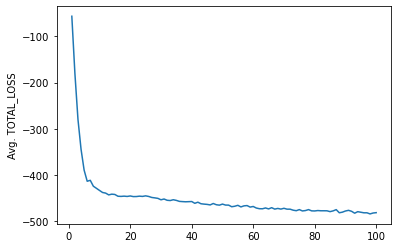

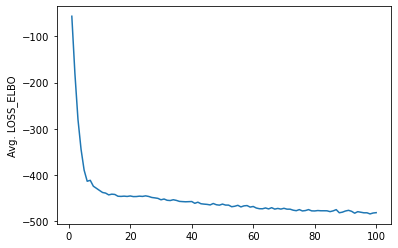

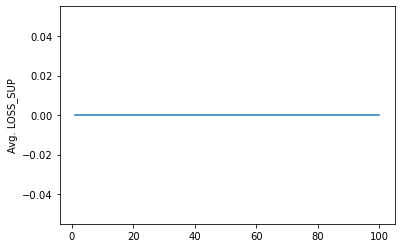

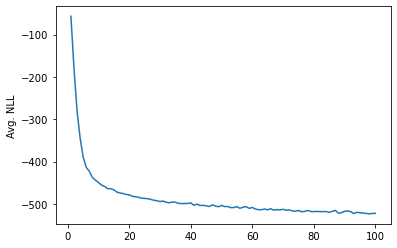

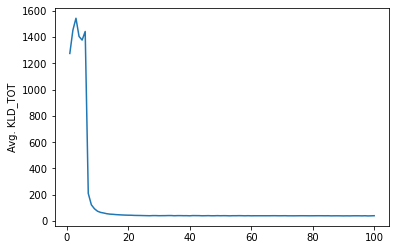

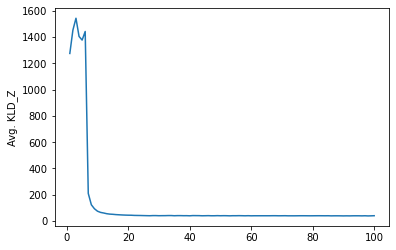

In [31]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

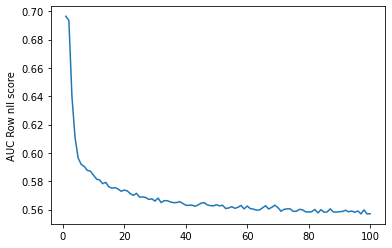

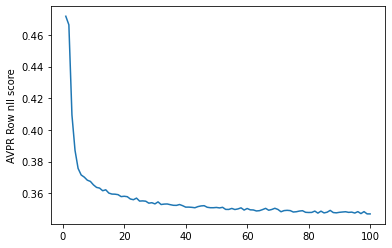

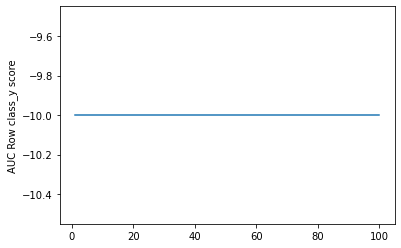

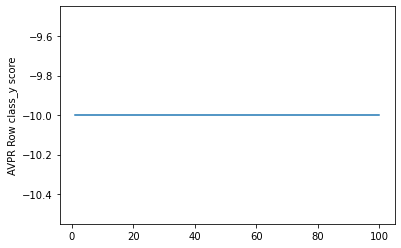

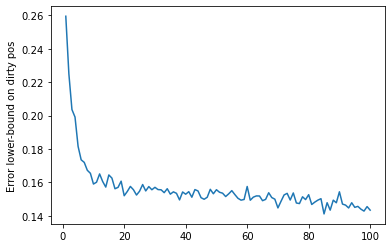

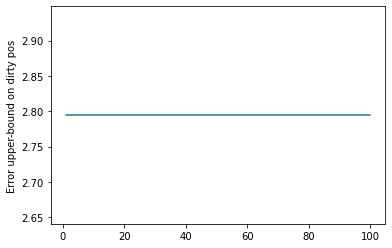

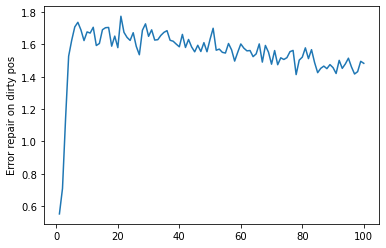

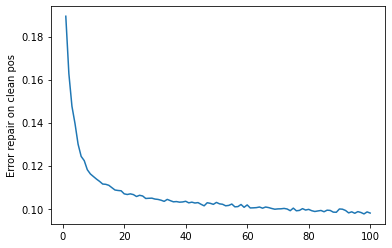

In [32]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

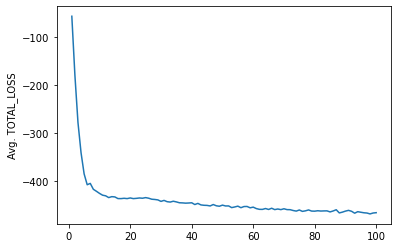

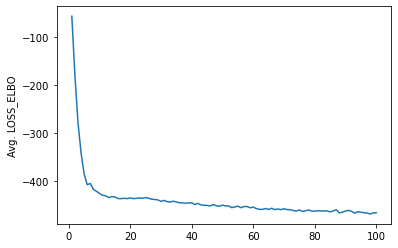

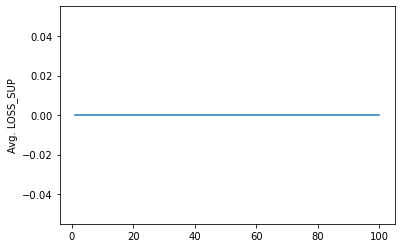

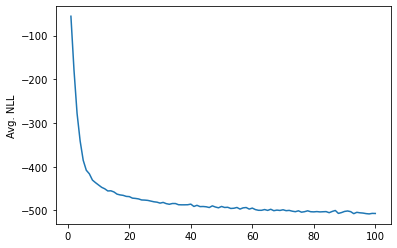

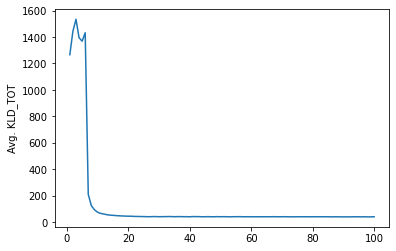

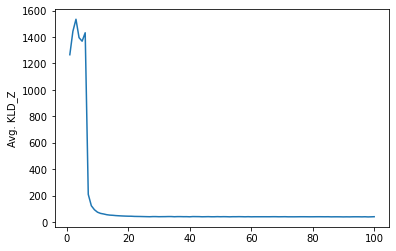

In [33]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

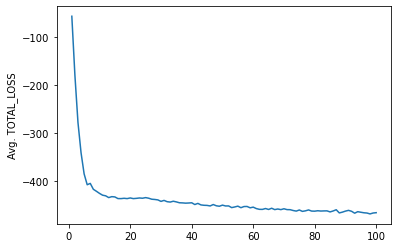

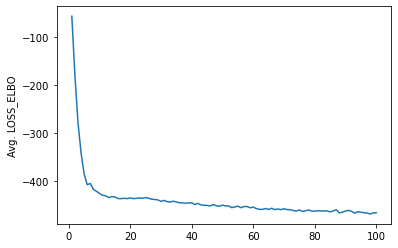

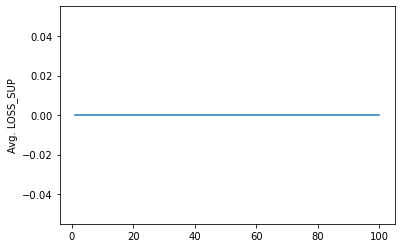

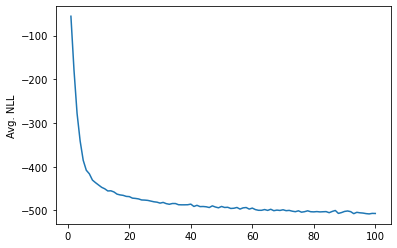

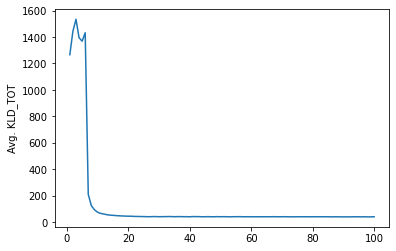

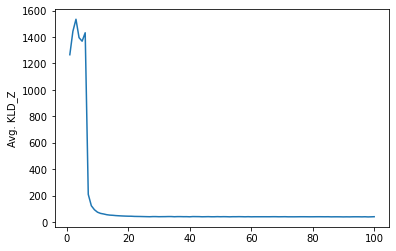

In [34]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [35]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train, y_targets=y_targets_mdl, repair_mode=True)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy()


In [36]:
# Show recon logvar
vae_p_params_xd['recon']['logvar_x'].exp()

tensor([0.0987], grad_fn=<ExpBackward>)

In [37]:
# Plot mu's and covariance's

z_train_mu = vae_q_params['z']['mu'].detach().cpu().numpy()
z_train_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy())

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_var, axis=0)))
print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_mu, axis=0)))


median of variances (per dim), clean: 
 [0.00070678 0.0007123  0.00069585 0.00406791 0.00251421 0.00018014
 0.0006125  0.00254037 0.00018812 0.00312725 0.0023927  0.00127963
 0.001969   0.00458947 0.00166768] 

median of means (per dim), clean: 
 [-0.06797809 -0.01066165 -0.01429979 -0.0046186   0.00413288 -0.00693506
 -0.06050258  0.00888997 -0.05184654  0.02436654  0.00333143  0.0381725
 -0.02229885 -0.01644041 -0.03683814] 



### Recons

In [38]:
recon_imgs_train = recons_train.reshape(-1,28,28)*dataset_obj.cont_stds + dataset_obj.cont_means

In [39]:
dataset_obj.cont_means

0.2880513707152192

In [40]:
dataset_obj.cont_stds

0.3558276959424768

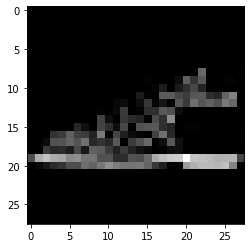

In [41]:
# Show image from train dataset

plt.imshow(x_train_orig[546], cmap="gray",)

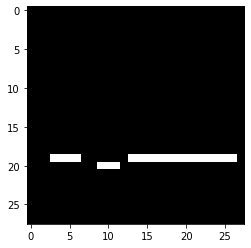

In [42]:
# Show image reconstruction from CVAE model

plt.imshow(np.around(recon_imgs_train[546]), cmap="gray", )

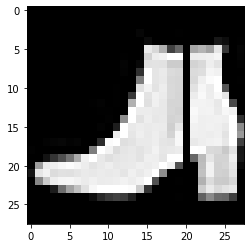

In [43]:
# Show image from train dataset

plt.imshow(x_train_orig[540], cmap="gray",)

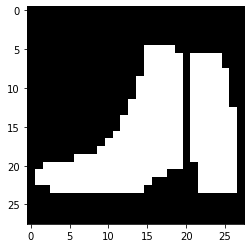

In [44]:
# Show image reconstruction from CVAE model

plt.imshow(np.around(recon_imgs_train[540]), cmap="gray", )

### Show Clean Datapoints at Random

y_noise: 0


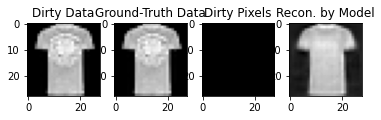

y_noise: 0


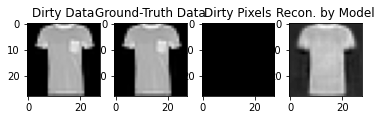

y_noise: 0


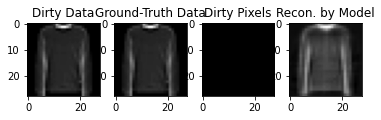

y_noise: 0


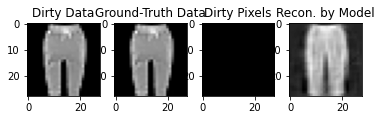

y_noise: 0


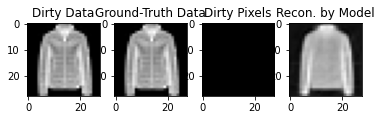

y_noise: 0


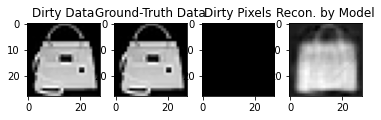

y_noise: 0


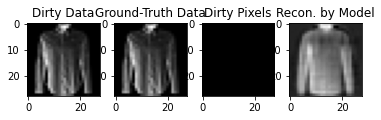

y_noise: 0


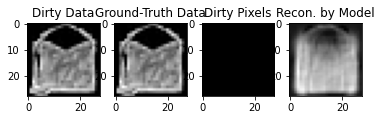

y_noise: 0


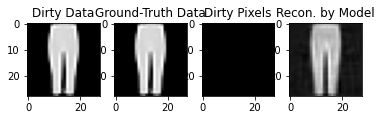

y_noise: 0


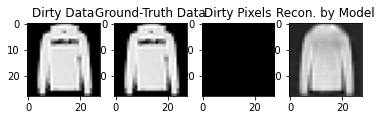

y_noise: 0


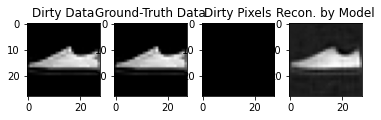

y_noise: 0


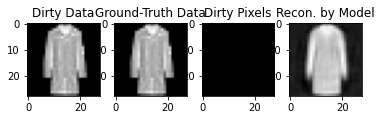

y_noise: 0


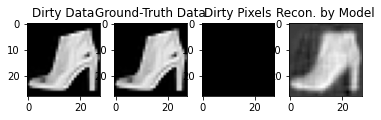

y_noise: 0


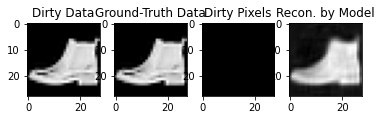

y_noise: 0


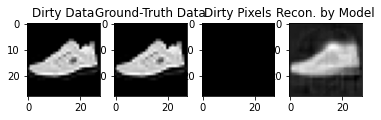

y_noise: 0


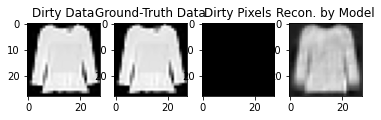

y_noise: 0


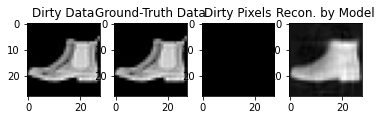

y_noise: 0


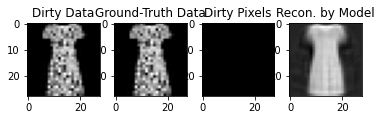

y_noise: 0


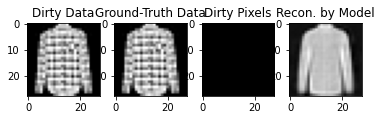

y_noise: 0


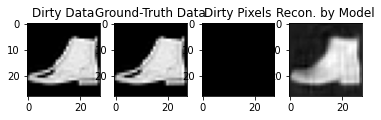

y_noise: 0


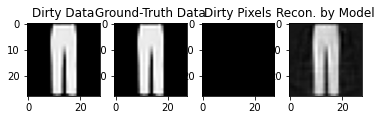

y_noise: 0


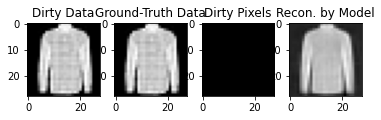

y_noise: 0


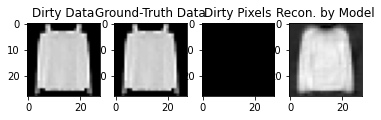

y_noise: 0


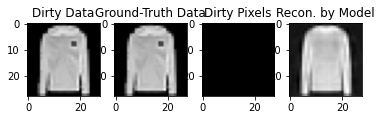

y_noise: 0


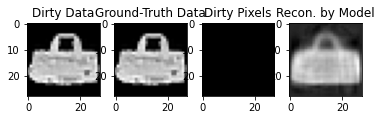

In [45]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Clean Datapoints at Random### Show Dirty Datapoints at Random

y_noise: 1


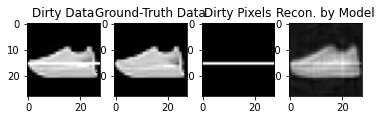

y_noise: 1


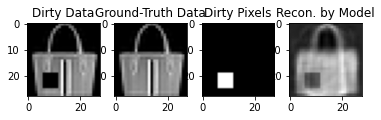

y_noise: 1


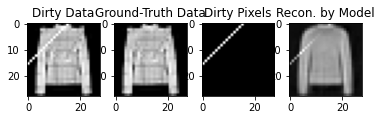

y_noise: 1


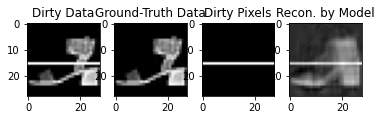

y_noise: 1


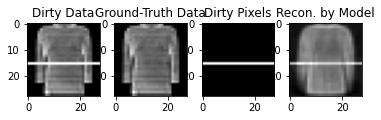

y_noise: 1


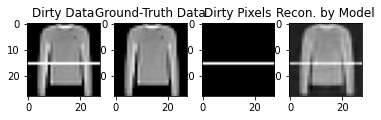

y_noise: 1


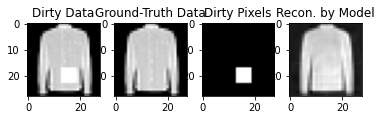

y_noise: 1


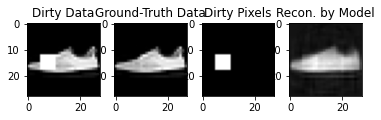

y_noise: 1


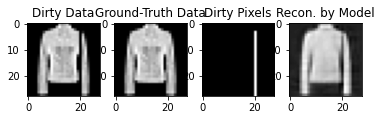

y_noise: 1


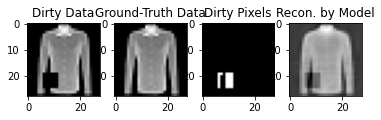

y_noise: 1


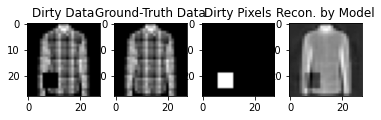

y_noise: 1


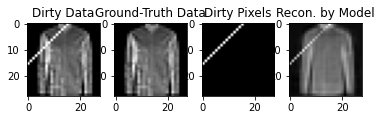

y_noise: 1


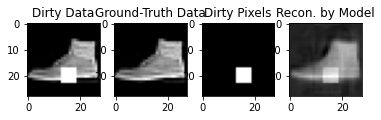

y_noise: 1


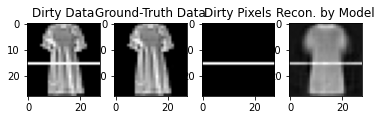

y_noise: 1


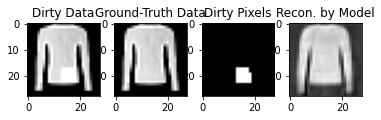

y_noise: 1


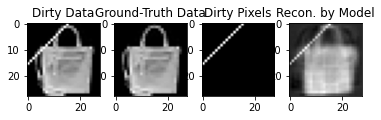

y_noise: 1


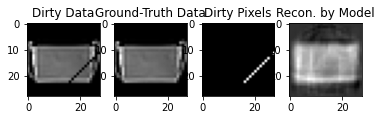

y_noise: 1


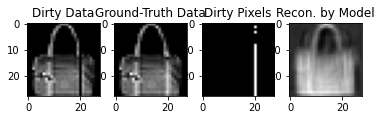

y_noise: 1


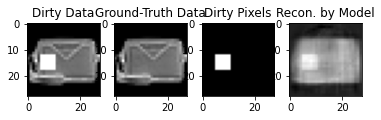

y_noise: 1


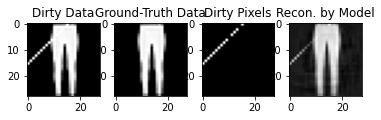

y_noise: 1


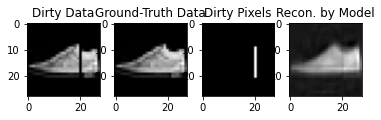

y_noise: 1


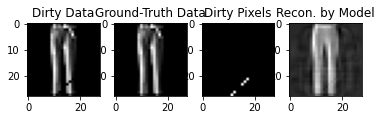

y_noise: 1


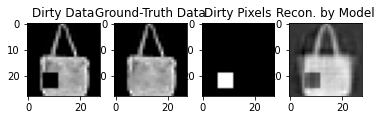

y_noise: 1


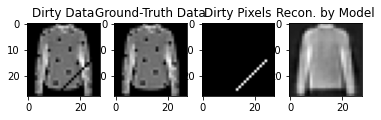

y_noise: 1


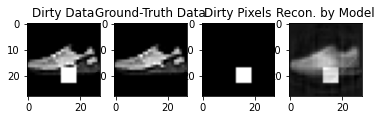

In [46]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict

Noise Tag: 0
Noise Indices: 
[49931, 9771, 2510, 33084, 41761, 7530, 38857, 53534, 21939, 14918, 39744, 15426, 32323, 20632, 7050, 4447, 45382, 43836, 889, 11720, 39865, 23198, 11298, 30709, 25732, 51560, 47193, 427, 49007, 30733, 329, 184, 50395, 16263, 15873, 8737, 9298, 20931, 8146, 14359, 29429, 24443, 8078, 5111, 42352, 40877, 34124, 11758, 16969, 35456, 33512, 17311, 31692, 29687, 18192, 354, 14346, 18371, 29243, 5827, 22187, 33753, 22468, 825, 36417, 25156, 6677, 11892, 39455, 28598, 28866, 29012, 49705, 18478, 17475, 29010, 46510, 52853, 3951, 32273, 51429, 38786, 18792, 45433, 41177, 38580, 41392, 43421, 1829, 10511, 46151, 23010, 32478, 40374, 44815, 15102, 33016, 14001, 48481, 14646, 1842, 27806, 24926, 44427, 50380, 21210, 11946, 44239, 47652, 24080, 12759, 17001, 28553, 24581, 45890, 43155, 29797, 18559, 5625, 24354, 50551, 10438, 8258, 18819, 275, 17584, 43356, 51916, 18405, 48138, 30938, 53837, 42044, 14145, 29088, 12916, 49020, 19994, 23257, 1813, 16677, 51223, 39860, 4

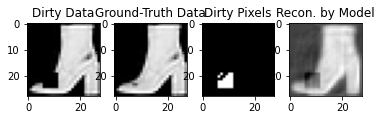

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


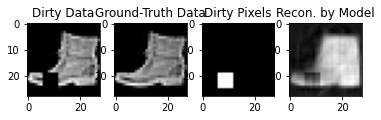

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


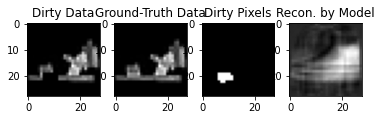

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


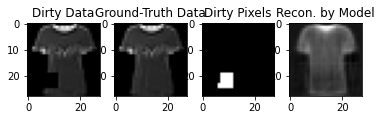

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


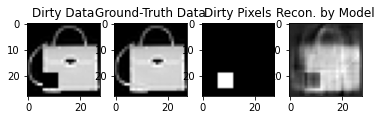

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


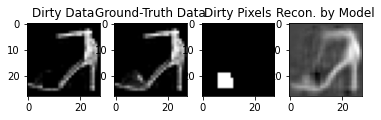

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


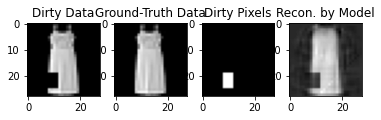

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


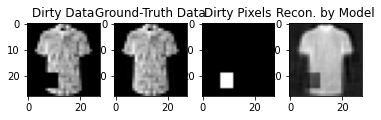

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


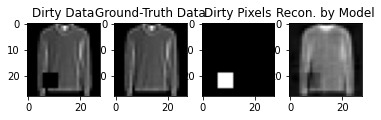

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


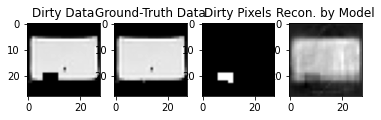







Noise Tag: 1
Noise Indices: 
[2268, 27023, 39295, 17345, 23381, 6724, 21779, 49332, 37763, 12352, 25490, 41004, 12120, 6851, 41191, 52734, 44138, 21195, 4012, 50839, 26136, 27191, 47045, 32952, 32785, 33875, 180, 24843, 24830, 35419, 7378, 1449, 39752, 48949, 20210, 44486, 35491, 42932, 19214, 13789, 40058, 8047, 42606, 47808, 47673, 24398, 11586, 44102, 20568, 1178, 8153, 37296, 29438, 14731, 39789, 17290, 20623, 20929, 7169, 13747, 16563, 4010, 42029, 50463, 47743, 5627, 1226, 42234, 46227, 22186, 18626, 34349, 14634, 4621, 13437, 8454, 9712, 49154, 34317, 53145, 49726, 37859, 33263, 34665, 40696, 41405, 11476, 45200, 7882, 37604, 34107, 35467, 46351, 5691, 7024, 27817, 18010, 34990, 25649, 2467, 7496, 48471, 21818, 43230, 50845, 44807, 14064, 23710, 29736, 10954, 27924, 37189, 17806, 37304, 17359, 31668, 49679, 20145, 8828, 27718, 5125, 9530, 12210, 32245, 17811, 12839, 41861, 21972, 22912, 25390, 2701, 43408, 51433, 48214, 44325, 49314, 22992, 23018, 36675, 12335, 7484, 7078,

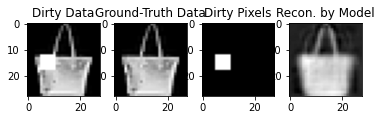

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


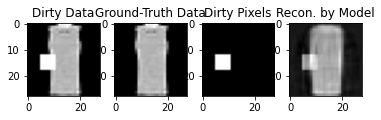

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


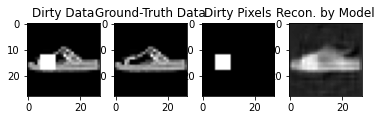

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


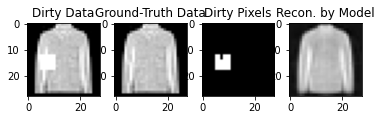

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


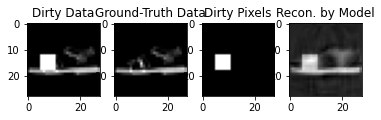

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


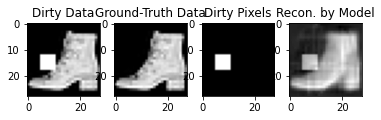

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


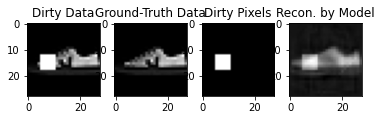

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


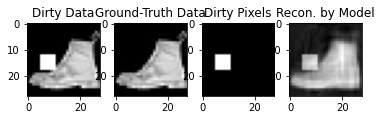

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


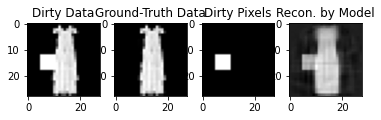

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


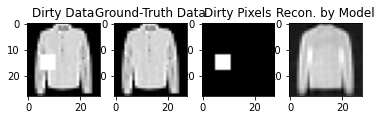







Noise Tag: 2
Noise Indices: 
[52779, 17788, 34554, 13623, 10531, 13700, 33584, 52448, 45317, 20115, 9326, 35823, 34557, 5426, 6829, 44986, 33693, 25305, 40581, 16629, 16001, 48505, 25911, 9510, 5268, 21970, 24585, 32050, 43151, 22268, 36353, 8949, 6303, 48762, 34382, 16466, 18890, 21839, 24773, 17496, 49823, 9462, 41420, 27798, 23594, 44911, 16838, 48332, 33951, 14218, 20845, 42306, 40390, 38054, 48068, 12499, 1548, 45174, 4040, 23881, 43826, 50418, 28417, 27913, 21362, 25921, 11775, 18170, 42183, 3415, 2611, 46995, 24266, 37984, 41214, 20917, 19490, 29409, 31751, 42060, 28040, 42123, 29576, 7119, 27383, 51591, 16515, 14063, 28379, 8023, 25618, 39199, 35583, 6326, 15419, 2340, 49177, 13897, 48046, 8501, 50772, 20143, 37360, 30964, 17317, 27474, 4111, 12250, 42540, 14790, 15091, 38929, 31914, 50222, 31321, 49903, 29467, 41790, 23972, 53082, 27071, 27897, 38879, 26217, 15853, 34636, 5430, 33746, 39250, 13322, 36011, 5819, 8590, 42478, 17616, 14345, 32335, 12681, 32986, 34195, 18549

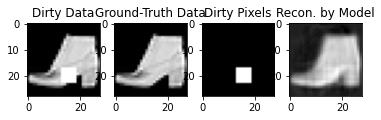

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


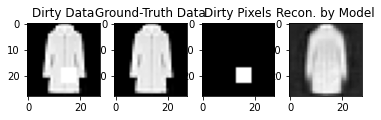

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


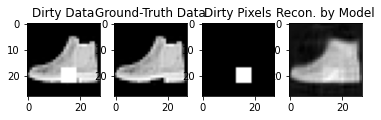

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


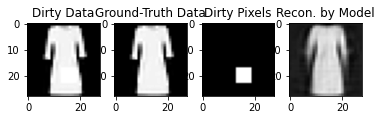

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


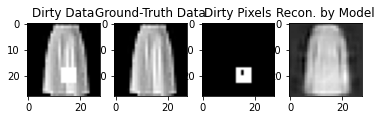

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


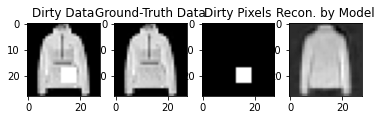

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


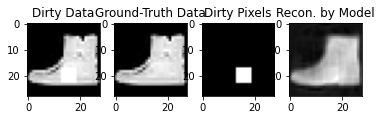

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


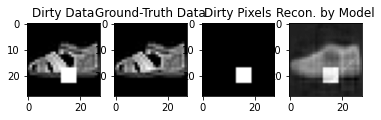

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


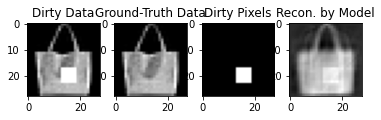

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


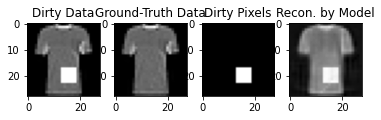







Noise Tag: 3
Noise Indices: 
[5853, 11247, 42551, 7181, 16971, 50044, 51782, 14722, 29140, 37744, 25137, 53907, 10840, 14324, 16757, 53262, 41469, 17974, 15416, 24707, 37293, 38816, 10987, 22127, 2641, 49496, 15671, 46066, 19139, 41891, 28160, 25336, 46399, 42703, 45763, 5178, 3483, 20680, 18845, 47719, 28075, 19678, 36318, 32345, 52609, 11071, 10666, 3146, 27766, 33779, 50527, 41442, 32319, 11920, 49201, 13393, 32048, 2091, 25676, 15667, 33091, 34035, 44390, 11182, 41226, 48094, 6797, 22581, 31176, 15013, 46307, 43893, 46453, 19705, 24350, 50379, 17524, 31972, 42550, 27037, 40082, 10809, 33896, 36274, 43520, 2846, 20520, 52770, 87, 26287, 22785, 30434, 16825, 48967, 24420, 6168, 46186, 37347, 45750, 48761, 49970, 41902, 34316, 3986, 52396, 19508, 37782, 45893, 34641, 33108, 32615, 30878, 8517, 28092, 3382, 43271, 3782, 2159, 12477, 51915, 5820, 25592, 32593, 8429, 25471, 33774, 47607, 25334, 283, 46247, 22726, 8026, 43521, 31427, 8226, 28153, 44405, 29219, 25611, 50983, 11965, 4

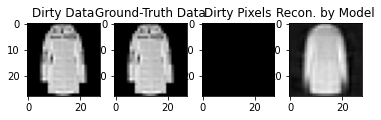

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


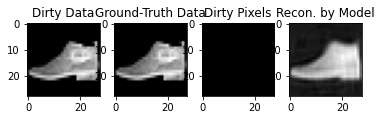

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


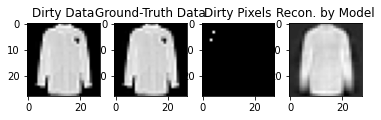

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


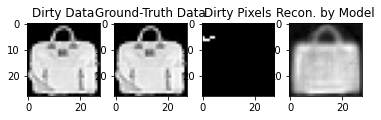

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


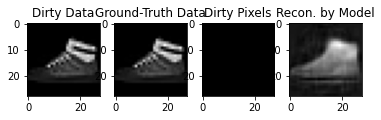

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


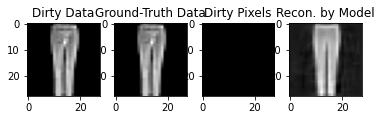

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


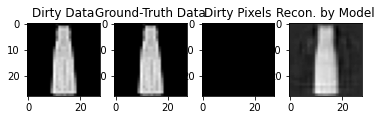

y_class (clean): 0 | y_noise: False | y_noise_tag (noise type): 3


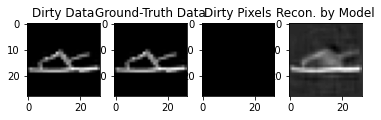

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


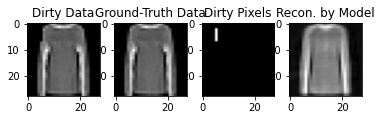

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


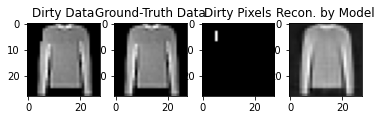







Noise Tag: 4
Noise Indices: 
[48575, 31148, 48450, 33830, 7987, 10979, 1890, 18322, 19790, 45950, 7745, 3091, 23937, 53797, 25488, 44933, 51698, 48005, 17100, 1365, 19039, 4002, 37067, 17886, 32907, 43312, 51657, 6153, 3318, 42061, 22969, 9812, 8061, 1077, 27400, 35271, 39484, 24516, 30069, 45491, 46324, 18508, 12583, 9978, 21282, 44903, 17853, 41611, 23748, 2369, 27320, 38491, 46181, 47549, 11944, 39121, 47470, 4845, 6150, 22136, 20136, 7640, 19879, 36558, 30010, 11538, 23295, 43274, 12090, 35806, 36044, 28327, 30707, 52095, 9025, 13832, 14662, 53234, 23949, 51981, 37775, 48746, 8821, 23859, 32559, 1272, 24058, 4869, 6784, 35433, 31126, 7079, 51871, 32266, 6666, 22040, 44831, 25763, 17982, 29302, 15324, 51808, 4417, 45326, 14601, 35863, 30904, 5610, 47043, 53370, 35717, 16154, 41557, 14105, 37807, 37335, 2009, 15439, 30029, 41156, 4303, 41094, 22388, 12831, 8792, 43175, 35699, 5881, 45136, 22659, 30368, 43694, 11220, 13492, 43669, 6849, 46615, 51712, 3833, 22157, 18750, 19896, 2

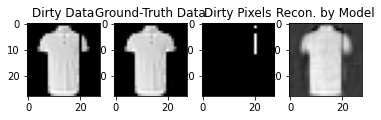

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


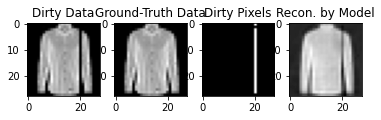

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


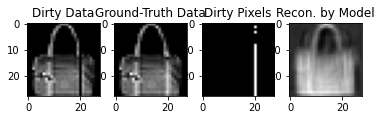

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


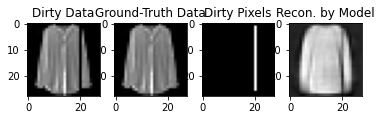

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


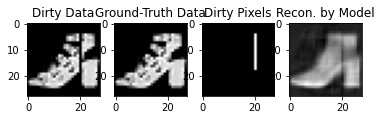

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


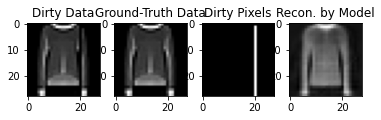

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


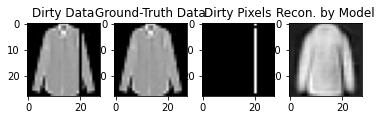

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


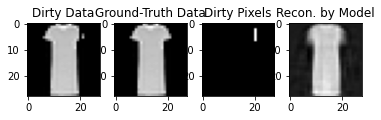

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


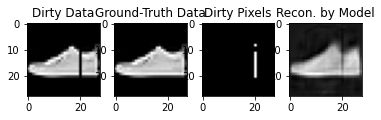

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 4


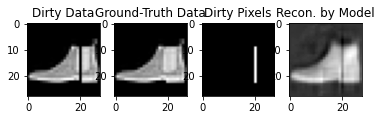







Noise Tag: 5
Noise Indices: 
[41366, 35857, 21758, 42930, 12425, 8919, 20074, 21360, 50284, 28505, 15387, 39772, 36500, 27442, 25985, 34272, 53223, 47175, 49465, 34404, 13910, 10124, 31626, 10920, 21897, 45556, 48088, 927, 43309, 27611, 16062, 4233, 20249, 25116, 36367, 11843, 3978, 4677, 22660, 43990, 31854, 34732, 53976, 3017, 1199, 49324, 44998, 27176, 11041, 18810, 29453, 34407, 4060, 17860, 20989, 15437, 10472, 2443, 9296, 13823, 17272, 24867, 10225, 27133, 32026, 17337, 35463, 34341, 41976, 29866, 35635, 24225, 14893, 45092, 47172, 347, 26071, 9039, 9220, 45828, 52221, 34739, 44667, 3012, 9371, 5393, 18051, 11131, 53536, 17752, 12194, 13315, 19093, 36948, 1780, 49077, 2266, 9322, 5217, 48240, 16182, 17219, 20798, 31912, 48181, 9518, 3780, 2652, 9397, 10342, 23460, 12787, 9150, 45606, 18477, 21612, 2721, 42149, 47290, 21396, 24486, 38086, 39885, 6469, 41985, 17023, 7632, 45420, 3602, 7466, 11383, 50371, 36845, 49424, 17898, 41024, 53137, 43949, 30608, 51186, 29372, 37628, 98

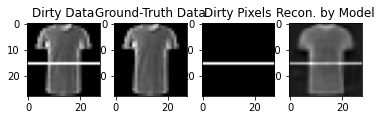

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


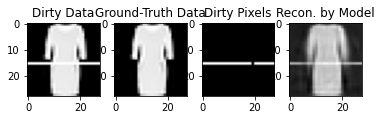

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


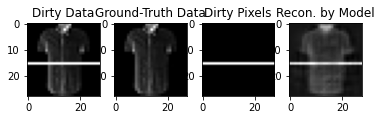

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


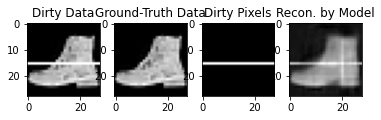

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


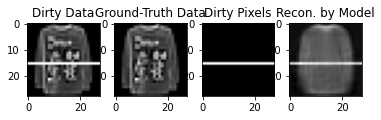

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


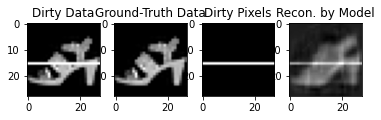

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


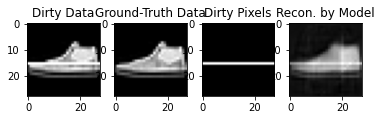

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


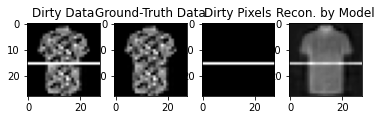

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


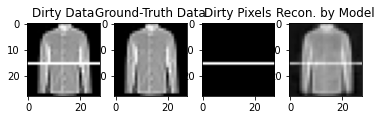

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 5


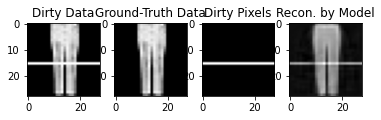







Noise Tag: 6
Noise Indices: 
[7450, 18091, 53161, 49480, 23297, 20825, 49950, 46922, 31791, 47239, 2759, 29933, 3967, 27056, 21588, 45917, 35274, 28391, 21857, 29897, 36213, 6516, 176, 35957, 31686, 6767, 35148, 34819, 49806, 7968, 32919, 10499, 53674, 11399, 46287, 8599, 1729, 26381, 47936, 19166, 14568, 49535, 26586, 34736, 32886, 37672, 13489, 44418, 19345, 24421, 36282, 33142, 3854, 10495, 36854, 44158, 19598, 621, 36704, 43908, 48847, 823, 48437, 43716, 49681, 37730, 52382, 12448, 35422, 24209, 50860, 29120, 14162, 44408, 49481, 23573, 24712, 26799, 37463, 24717, 24821, 52078, 33064, 21141, 6801, 36890, 36035, 4969, 45019, 41325, 39141, 23507, 29859, 42837, 7630, 26319, 44862, 13728, 42802, 41813, 4038, 30978, 33337, 8563, 8976, 1406, 53428, 14458, 38137, 52549, 16744, 50805, 53725, 49838, 41342, 15843, 4019, 23533, 5488, 14925, 19596, 23903, 29812, 1516, 22518, 45516, 11517, 1356, 8787, 8262, 47513, 20215, 27697, 44719, 2471, 12564, 16003, 53466, 18288, 11959, 41042, 7215, 

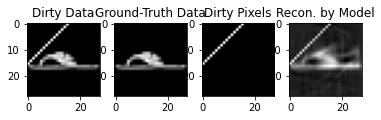

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


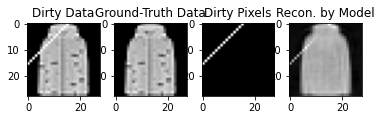

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


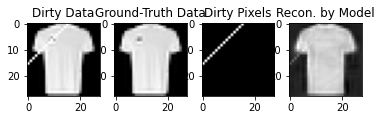

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


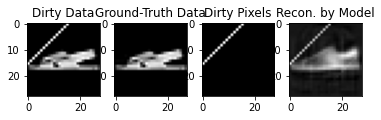

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


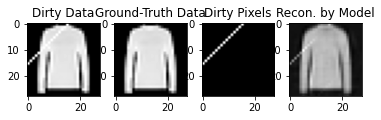

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


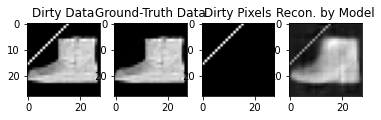

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


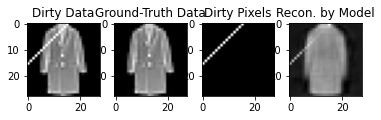

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


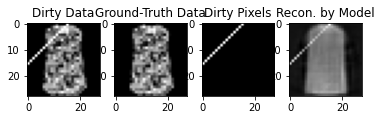

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


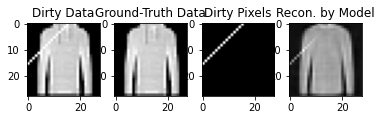

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 6


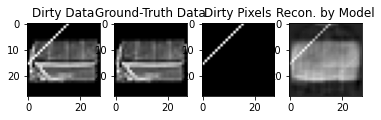







Noise Tag: 7
Noise Indices: 
[24116, 1936, 30892, 436, 45639, 12774, 7036, 15748, 42345, 33410, 6895, 30732, 44321, 32808, 4941, 3345, 41802, 19475, 31290, 1214, 7779, 42162, 12423, 9815, 40017, 48751, 52087, 15935, 52165, 44593, 22784, 39842, 19136, 28107, 11035, 19283, 38796, 5210, 33783, 13330, 43729, 44077, 32772, 46487, 22866, 37235, 46813, 31233, 24933, 36083, 24674, 11357, 19472, 22532, 9783, 3935, 23688, 1962, 16373, 44872, 28605, 48475, 19844, 18389, 33815, 31561, 52914, 41207, 32861, 52985, 49168, 50930, 26936, 37179, 51109, 12670, 7236, 37932, 30604, 42300, 31331, 53210, 45128, 44003, 10767, 1135, 43785, 45199, 45450, 30053, 9551, 31890, 38569, 42981, 12302, 36436, 11922, 26980, 36273, 33525, 44014, 20494, 5607, 22666, 52979, 3543, 49510, 44165, 33109, 31596, 40989, 43148, 26160, 26950, 10551, 11271, 42268, 25520, 2275, 27541, 2255, 52100, 37045, 46475, 17222, 10502, 11094, 5412, 8347, 46890, 30175, 19604, 42317, 24251, 28590, 38278, 22985, 25298, 31439, 5236, 15862, 2

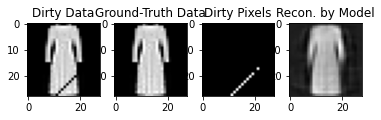

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


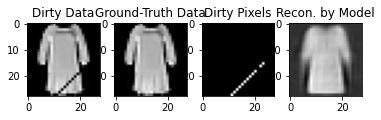

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


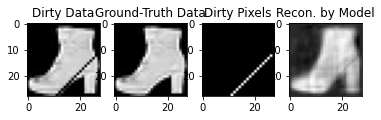

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


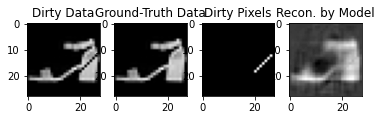

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


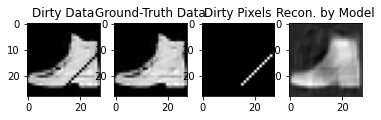

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


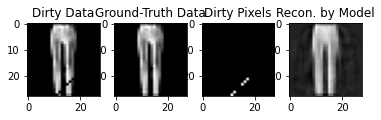

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


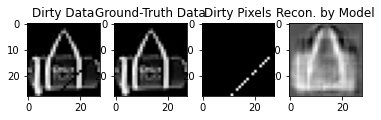

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


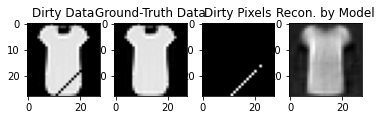

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


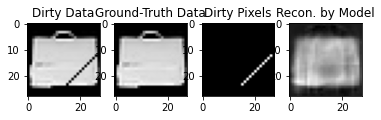

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 7


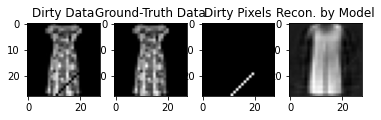

In [47]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")


### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [48]:
len(trusted_idxs_train)

900

y_noise: 0


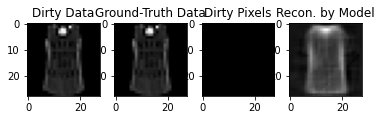

y_noise: 0


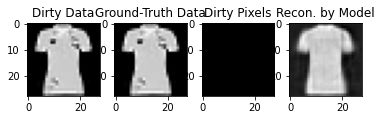

y_noise: 0


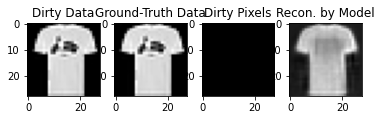

y_noise: 0


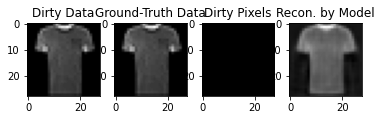

y_noise: 0


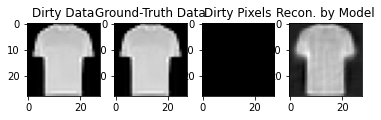

y_noise: 0


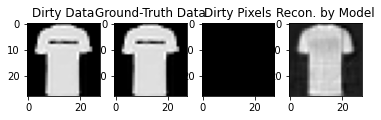

y_noise: 0


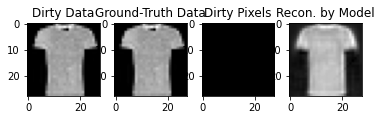

y_noise: 0


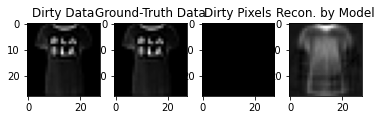

y_noise: 0


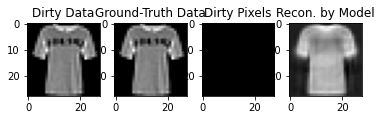

y_noise: 0


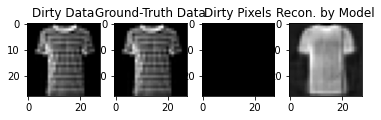

y_noise: 0


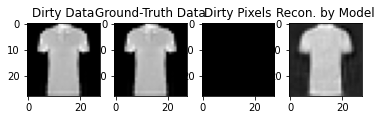

y_noise: 0


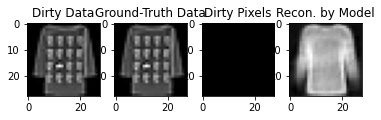

y_noise: 0


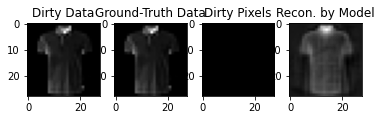

y_noise: 0


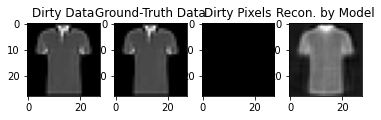

y_noise: 0


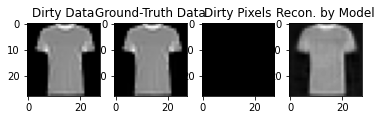

y_noise: 0


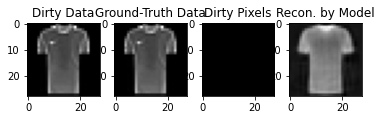

y_noise: 0


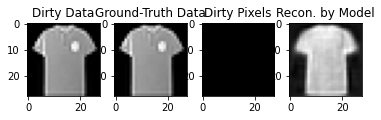

y_noise: 0


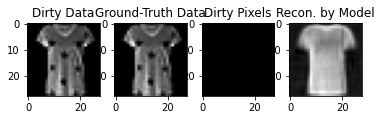

y_noise: 0


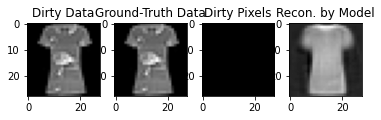

y_noise: 0


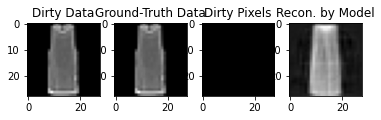

y_noise: 0


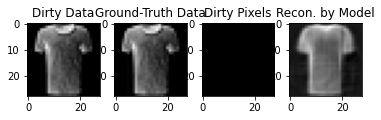

y_noise: 0


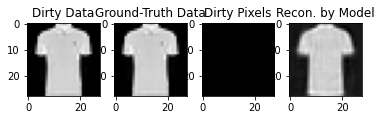

y_noise: 0


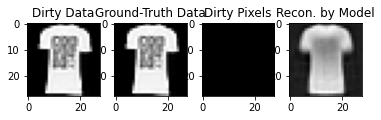

y_noise: 0


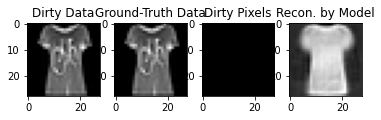

y_noise: 0


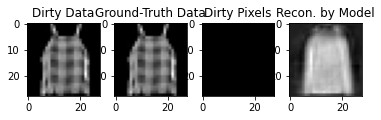

y_noise: 0


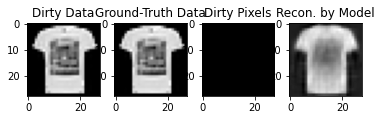

y_noise: 0


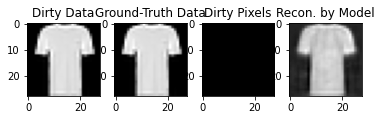

y_noise: 0


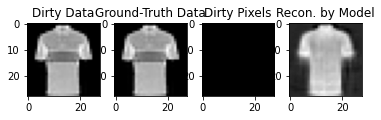

y_noise: 0


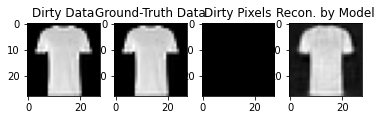

y_noise: 0


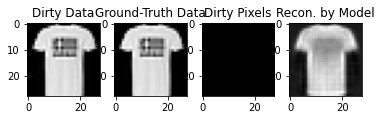

y_noise: 0


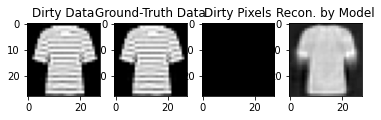

y_noise: 0


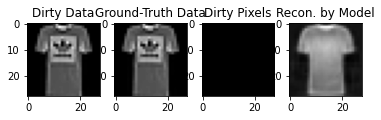

y_noise: 0


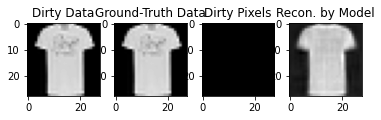

y_noise: 0


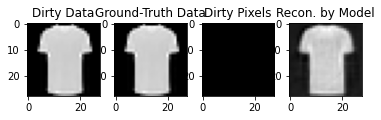

y_noise: 0


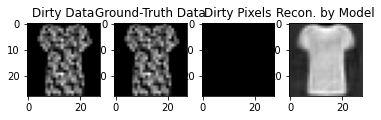

y_noise: 0


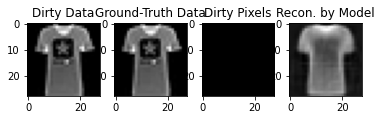

y_noise: 0


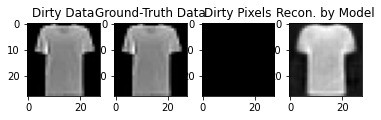

y_noise: 0


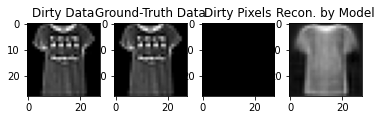

y_noise: 0


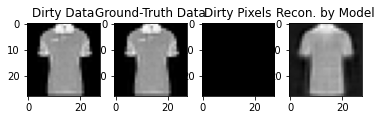

y_noise: 0


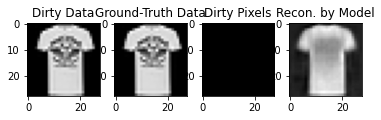

y_noise: 0


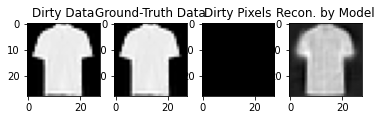

y_noise: 0


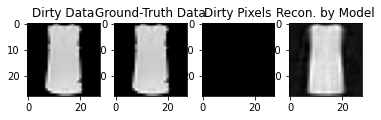

y_noise: 0


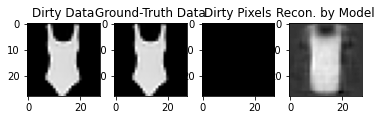

y_noise: 0


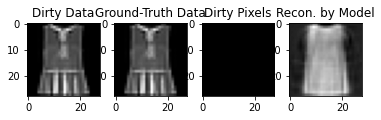

y_noise: 0


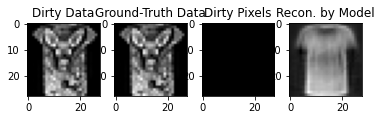

y_noise: 0


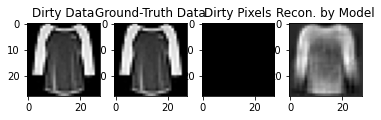

y_noise: 0


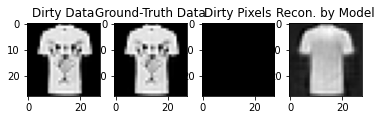

y_noise: 0


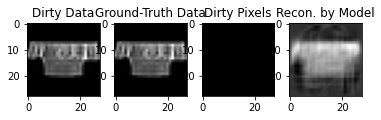

y_noise: 0


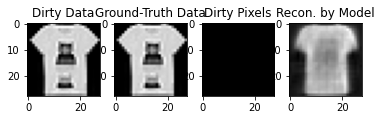

y_noise: 0


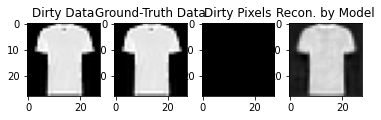

y_noise: 0


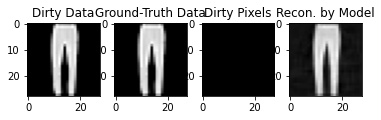

y_noise: 0


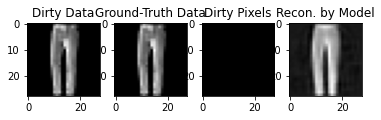

y_noise: 0


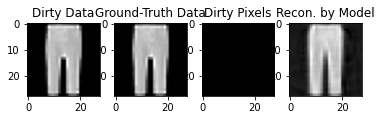

y_noise: 0


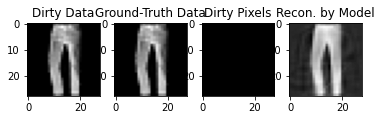

y_noise: 0


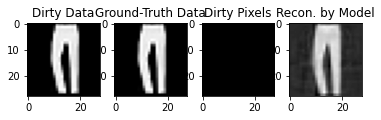

y_noise: 0


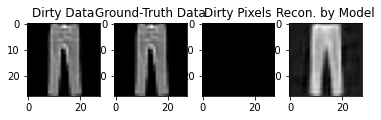

y_noise: 0


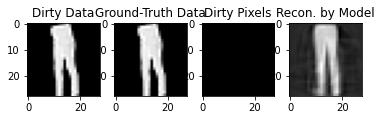

y_noise: 0


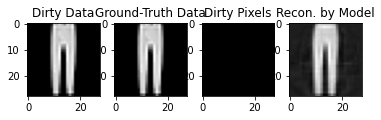

y_noise: 0


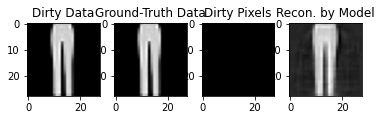

y_noise: 0


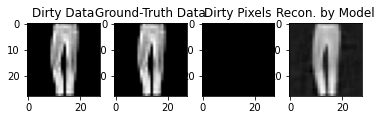

y_noise: 0


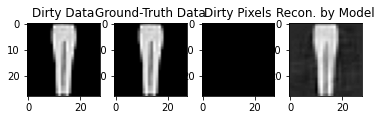

y_noise: 0


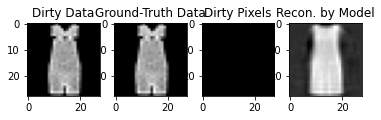

y_noise: 0


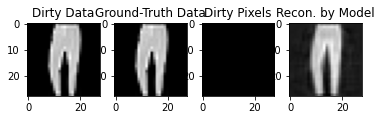

y_noise: 0


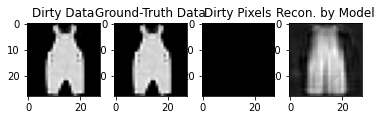

y_noise: 0


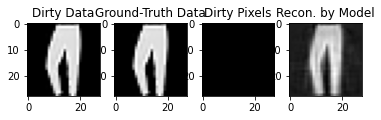

y_noise: 0


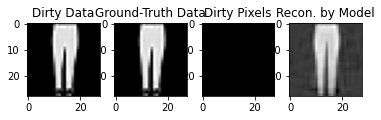

y_noise: 0


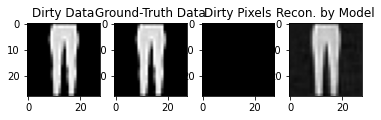

y_noise: 0


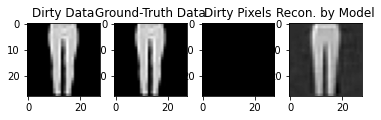

y_noise: 0


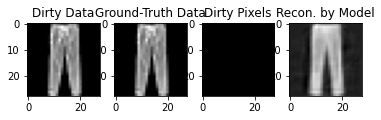

y_noise: 0


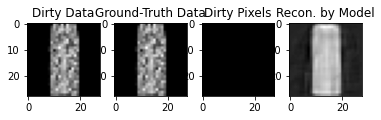

y_noise: 0


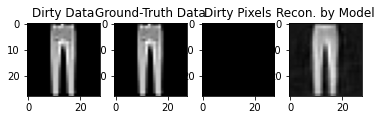

y_noise: 0


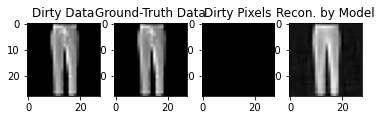

y_noise: 0


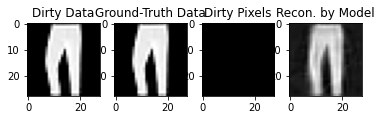

y_noise: 0


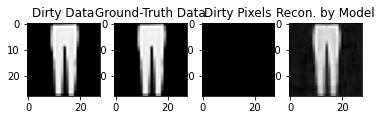

y_noise: 0


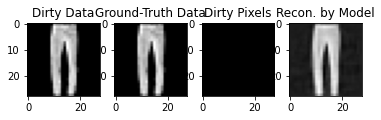

y_noise: 0


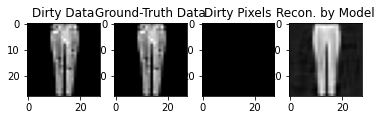

y_noise: 0


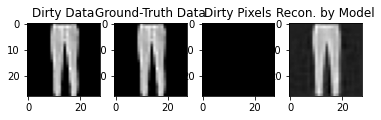

y_noise: 0


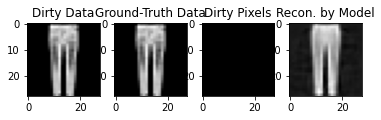

y_noise: 0


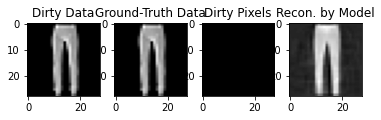

y_noise: 0


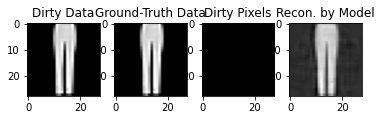

y_noise: 0


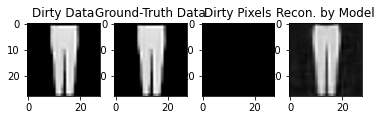

y_noise: 0


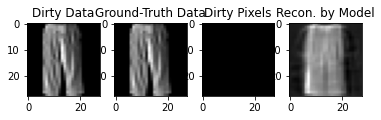

y_noise: 0


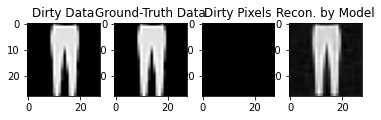

y_noise: 0


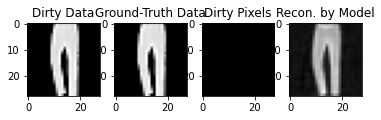

y_noise: 0


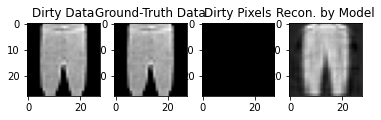

y_noise: 0


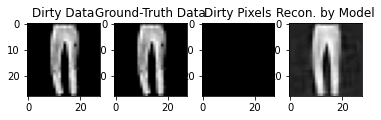

y_noise: 0


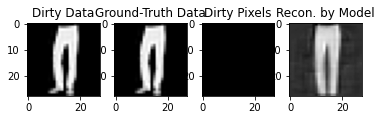

y_noise: 0


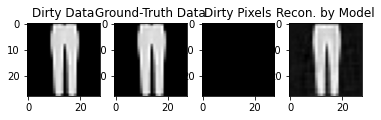

y_noise: 0


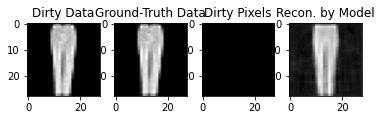

y_noise: 0


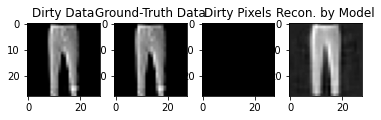

y_noise: 0


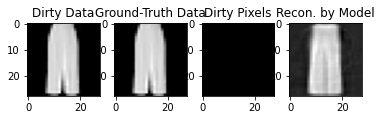

y_noise: 0


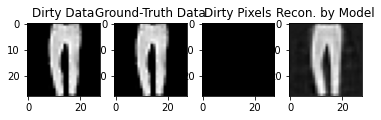

y_noise: 0


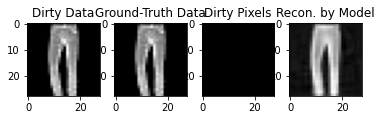

y_noise: 0


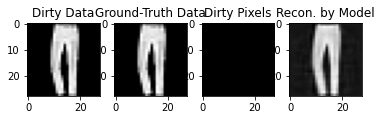

y_noise: 0


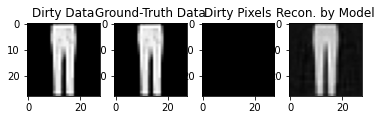

y_noise: 0


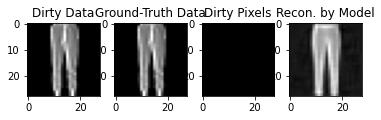

y_noise: 0


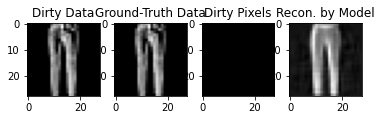

y_noise: 0


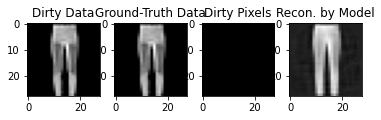

y_noise: 0


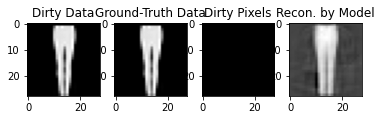

y_noise: 0


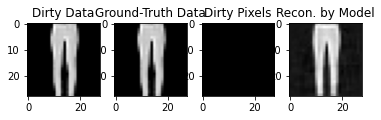

y_noise: 0


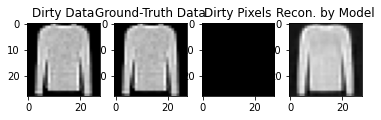

y_noise: 0


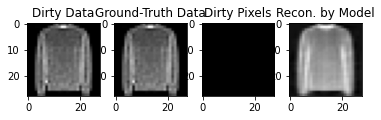

y_noise: 0


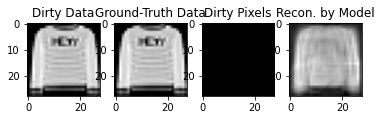

y_noise: 0


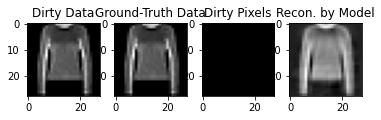

y_noise: 0


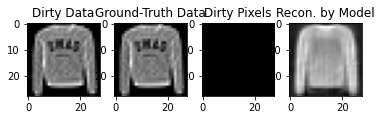

y_noise: 0


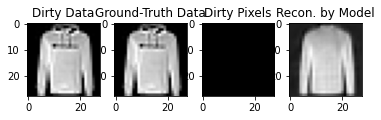

y_noise: 0


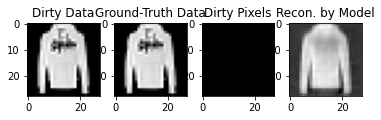

y_noise: 0


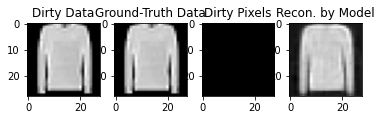

y_noise: 0


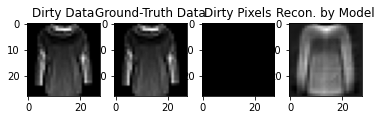

y_noise: 0


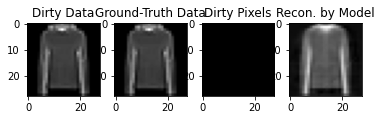

y_noise: 0


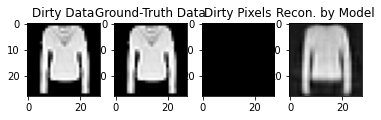

y_noise: 0


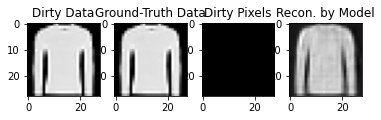

y_noise: 0


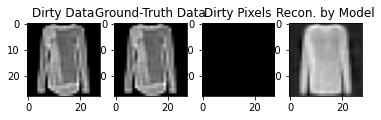

y_noise: 0


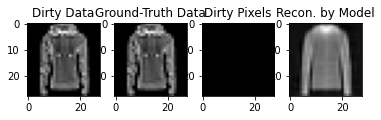

y_noise: 0


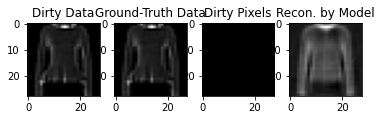

y_noise: 0


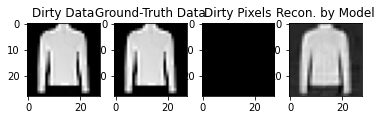

y_noise: 0


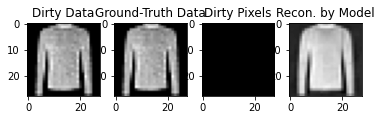

y_noise: 0


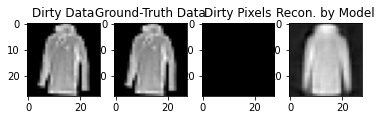

y_noise: 0


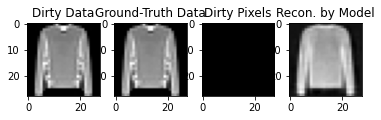

y_noise: 0


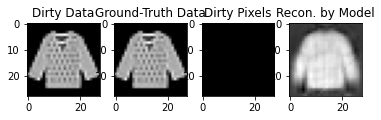

y_noise: 0


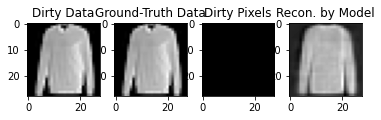

y_noise: 0


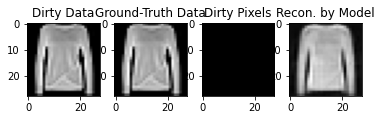

y_noise: 0


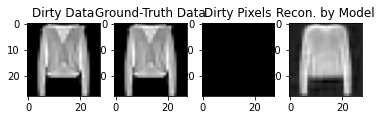

y_noise: 0


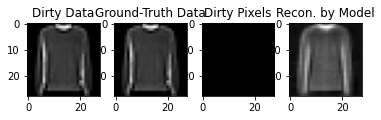

y_noise: 0


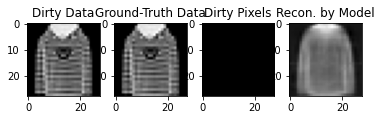

y_noise: 0


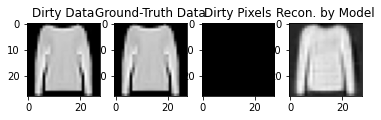

y_noise: 0


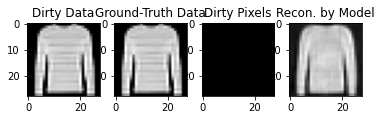

y_noise: 0


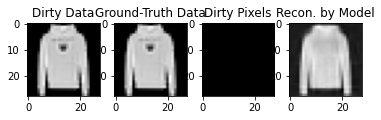

y_noise: 0


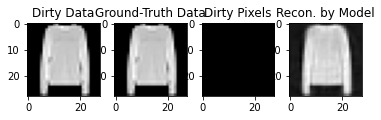

y_noise: 0


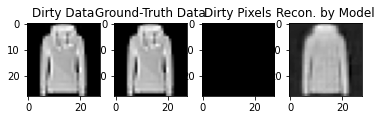

y_noise: 0


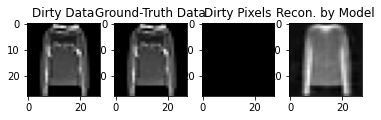

y_noise: 0


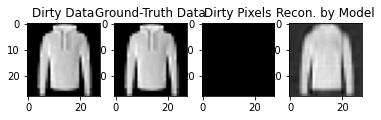

y_noise: 0


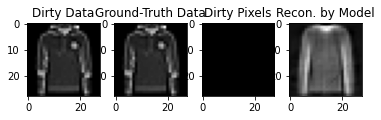

y_noise: 0


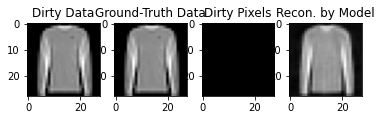

y_noise: 0


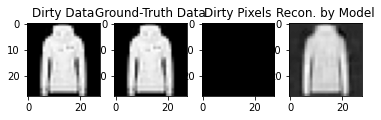

y_noise: 0


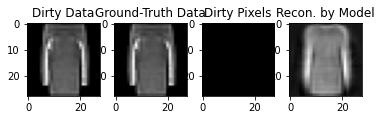

y_noise: 0


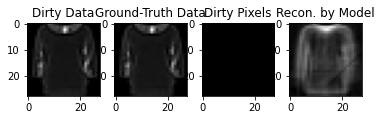

y_noise: 0


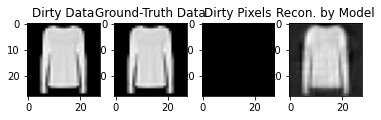

y_noise: 0


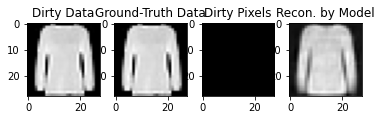

y_noise: 0


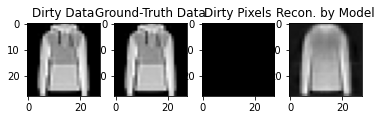

y_noise: 0


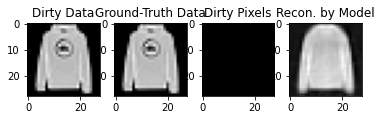

y_noise: 0


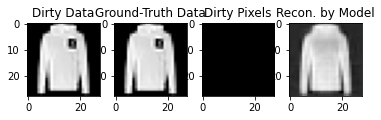

y_noise: 0


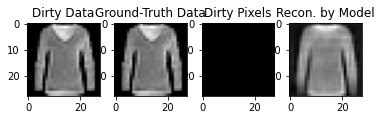

y_noise: 0


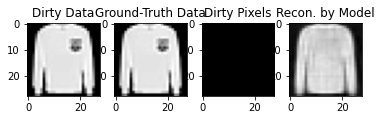

y_noise: 0


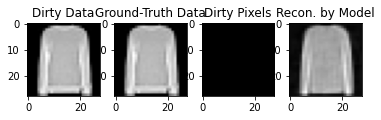

y_noise: 0


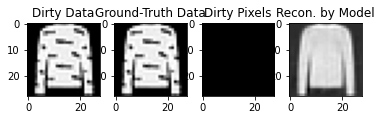

y_noise: 0


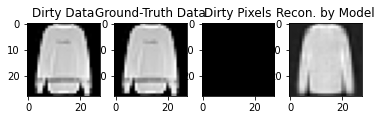

y_noise: 0


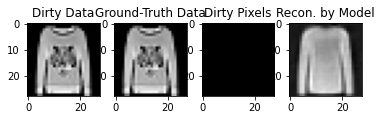

y_noise: 0


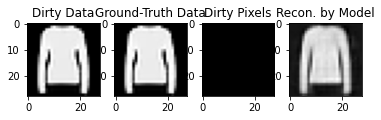

y_noise: 0


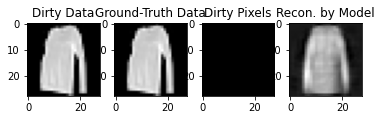

In [49]:
    
cnt = 1
    
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()
    
    cnt += 1

    if cnt > 150:
        break



### Show Latent Space

In [50]:
# noised_rows = y_noise_instance_train
# noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [51]:
# from sklearn.decomposition import PCA

# # Use underlying clean train data for representation
# pca_2d_z = PCA(n_components=2) # PCA
# pca_2d_z.fit(z_train_clean)

In [52]:
# pca_2d_z.explained_variance_

In [53]:
# z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)

In [54]:
# df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
#                                    "x_2": z_train_pca2d_clean[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

### Kernel PCA

In [55]:
# from sklearn.decomposition import KernelPCA


# pca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
# pca_2d_z.fit(z_train_clean)

In [56]:
# z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)

In [57]:
# df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
#                                    "x_2": z_train_pca2d_clean[:,1], 
#                                    "type": noised_rows_str})
# sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
# plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

### Approx. Log-Likelihood

In [58]:
from smm_models.loss_utils import log_px_approx_eval

In [59]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();
# y_noise_instance_train

In [60]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae = log_px_approx_eval(vae_mdl,
                                   dataset_obj,
                                   x_inputs,
                                   k_samples=250,
                                   y_comps=False,
                                   batch_size=128, 
                                   y_targets=y_targets_mdl.cuda(), 
                                   repair_mode=True)

    # to clear GPU Mem -- if used.
    log_px_est = elbo_iwae.clone().cpu()
    
    del elbo_iwae
    torch.cuda.empty_cache()


Compute Progress: 100%|███████████████████████████████████████████| 422/422 [00:12<00:00, 34.84it/s]


In [61]:
print(prof)

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                               [memory]         0.00%       0.000us         0.00%       0.000us       0.000us       0.000us         0.00%       0.000us       0.000us          -8 b          -8 b           0 b           0 

In [62]:
arrs_elbo_iwae = np.concatenate([log_px_est, y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [63]:
df_elbo_iwae

log_px noise_label
0      486.590759       clean
1      497.801514       clean
2      287.497833       dirty
3      477.897736       clean
4      736.585999       clean
...           ...         ...
53995  399.241760       clean
53996   15.574139       clean
53997  664.759644       clean
53998  614.429688       clean
53999  637.333008       clean

[54000 rows x 2 columns]

In [64]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

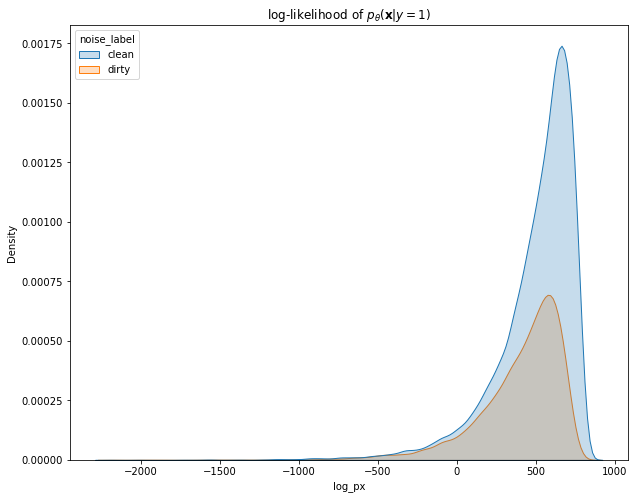

In [65]:
fig, axes = plt.subplots(1,1, figsize=(10,8))

sns.kdeplot(ax=axes, data=df_elbo_iwae, x="log_px", hue="noise_label", fill=True, legend=True)

axes.set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes, "upper left")


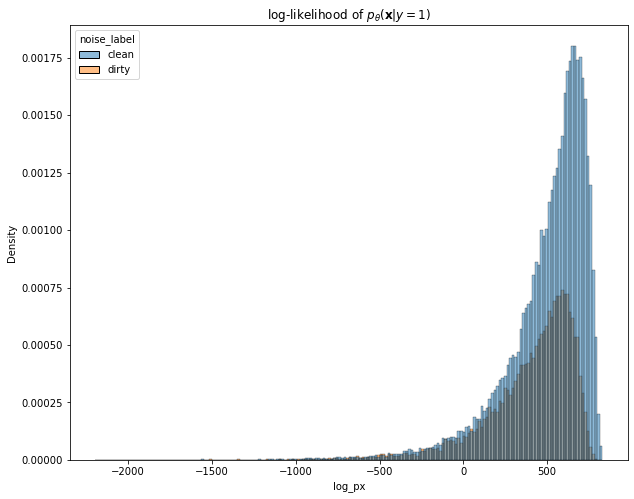

In [66]:
fig, axes = plt.subplots(1,1, figsize=(10,8))

sns.histplot(ax=axes, data=df_elbo_iwae, x="log_px", hue="noise_label", legend=True, stat="density")
axes.set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes, "upper left")
